In [7]:
import jax
from jax import numpy as jnp
import matplotlib.pyplot as plt
import ces
import balance

In [8]:
class Balance_Model():
    def __init__(self, n, m, seed = 0):
        #размеры экономики
        self.n = n
        self.m = m 
        #ключ для RNG
        self.key = jax.random.PRNGKey(seed)
        #эффективная I/O-таблица
        self.Z = jnp.zeros((n+m,n))
        self.Z = self.Z.at[:n,:].set(jnp.eye(self.n))
        self.Z = self.Z.at[n:,:].set(jnp.ones((self.m, self.n)))
        #эффективные параметры "ро"
        self.rho = jnp.ones(n)
    
    def predict(self, Z, rho, s, h, Z0):
        n, m = Z.shape
        n, m = m, n - m
        W = ces.W(Z, rho)
        p = ces.balance_prices(W, rho, s, h)
        J = ces.J(p, W, rho) #пропорции
        print(J.shape)
        y = jnp.linalg.inv(jnp.diag(jnp.sum(J, axis = 0)) - J[:n,:]) @ Z0
        return y * J

In [9]:
n, m = 33, 3
table = balance.read_NIOT('NIOTS/RUS_NIOT_nov16.xlsx')[14]
Z = table[:,:n]
Z0 = jnp.sum(table[:,n:], axis = 1)[:n]

In [10]:
model = Balance_Model(n, m)
rho = jax.random.uniform(model.key, (n,), minval=0.1, maxval = 10)
model.Z = Z
model.rho = rho
s = jnp.ones(m)
h = jnp.zeros(n)
# именно так они и будут везде использоваться 

In [11]:
Z_pred = model.predict(Z, rho, s, h, Z0)

(36, 33)


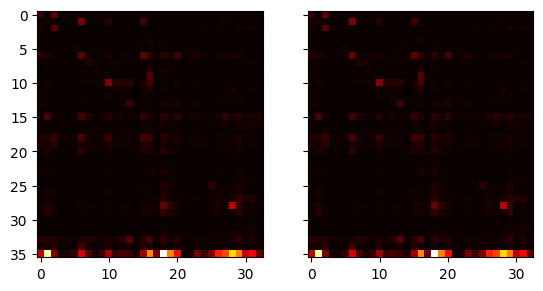

In [12]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(Z, cmap='hot', interpolation='nearest')
ax2.imshow(Z_pred, cmap='hot', interpolation='nearest')